## 导入库

In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 加载数据

In [2]:
df_train = pd.read_csv('./data/train.tsv', sep='\t')
df_test = pd.read_csv('./data/test.tsv', sep='\t')

In [3]:
X_train = df_train.Phrase
y_train = df_train.Sentiment
tokenize = keras.preprocessing.text.Tokenizer()
tokenize.fit_on_texts(X_train.values)

In [4]:
X_test = df_test.Phrase
X_train = tokenize.texts_to_sequences(X_train)
X_test = tokenize.texts_to_sequences(X_test)

In [5]:
max_lenght = max([len(s.split()) for s in df_train['Phrase']])
X_train = keras.preprocessing.sequence.pad_sequences(X_train, max_lenght)
X_test = keras.preprocessing.sequence.pad_sequences(X_test, max_lenght)

## 参数

In [6]:
EMBEDDING_DIM = 370
unknown = len(tokenize.word_index)+1

## 模型

In [7]:
model = keras.models.Sequential([
    keras.layers.Embedding(unknown, EMBEDDING_DIM, input_length=max_lenght),
    keras.layers.LSTM(60, return_sequences=True),
    keras.layers.GlobalMaxPool1D(),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(5, activation="softmax")
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 52, 370)           5656930   
_________________________________________________________________
lstm (LSTM)                  (None, 52, 60)            103440    
_________________________________________________________________
global_max_pooling1d (Global (None, 60)                0         
_________________________________________________________________
dropout (Dropout)            (None, 60)                0         
_________________________________________________________________
dense (Dense)                (None, 50)                3050      
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 2

## 损失和优化

In [8]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## 训练

In [9]:
history = model.fit(X_train, y_train, batch_size=128, epochs=7, validation_split=0.2)

Train on 124848 samples, validate on 31212 samples
Epoch 1/7
124848/124848 [==============================] - 63s 502us/sample - loss: 0.9685 - accuracy: 0.6109 - val_loss: 0.9659 - val_accuracy: 0.6069
Epoch 2/7
124848/124848 [==============================] - 61s 486us/sample - loss: 0.7648 - accuracy: 0.6867 - val_loss: 0.9687 - val_accuracy: 0.6101
Epoch 3/7
124848/124848 [==============================] - 60s 484us/sample - loss: 0.6877 - accuracy: 0.7113 - val_loss: 0.9908 - val_accuracy: 0.6105
Epoch 4/7
124848/124848 [==============================] - 61s 485us/sample - loss: 0.6323 - accuracy: 0.7315 - val_loss: 1.0379 - val_accuracy: 0.6040
Epoch 5/7
124848/124848 [==============================] - 60s 483us/sample - loss: 0.5905 - accuracy: 0.7470 - val_loss: 1.0458 - val_accuracy: 0.6063
Epoch 6/7
124848/124848 [==============================] - 60s 483us/sample - loss: 0.5544 - accuracy: 0.7600 - val_loss: 1.1120 - val_accuracy: 0.5877
Epoch 7/7
124848/124848 [============

## 绘梯度图

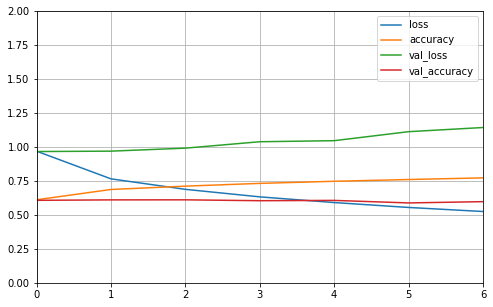

In [10]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 2)
    plt.show()
    
plot_learning_curves(history)

In [11]:
model.save('./save/save_model/model.h5')

In [12]:
model.save_weights('./save/save_weights/model_weights.h5')